**Installing the dependencies**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
import pickle

**Loading Data**

In [70]:
df = pd.read_csv('Telco_Cusomer_Churn.csv')

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
df.shape

(7043, 21)

In [74]:
#display all columns in the dataframe
pd.set_option('display.max_columns',None)

In [75]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [76]:
#drop the customerID since this is not needed
df = df.drop(columns=['customerID'])

In [77]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [78]:
#print the unique values in the columns except numerical one
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
#iterate the unique values in columns
for col in df.columns:
    if col not in numerical_col:
        print(col, df[col].unique())
        print('-'*25)

gender ['Female' 'Male']
-------------------------
SeniorCitizen [0 1]
-------------------------
Partner ['Yes' 'No']
-------------------------
Dependents ['No' 'Yes']
-------------------------
PhoneService ['No' 'Yes']
-------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------
Contract ['Month-to-month' 'One year' 'Two year']
-------------------------
PaperlessBilling ['Yes' 'No']
-------------------------
PaymentMethod ['Electronic che

In [79]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
#there are some missing values in the TotalCharges col.
df[df['TotalCharges']== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [81]:
len(df[df['TotalCharges']== ' '])

11

In [82]:
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})

In [83]:
len(df[df['TotalCharges']== ' '])

0

In [84]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [86]:
df['tenure'] = df['tenure'].astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [88]:
#print the churn class distribution
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**There is an imbalance class**

**Exploratory Data Analysis**

*Numerical Columns Analysis*

In [89]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [90]:
#define a function to create histogram for all columns in the dataframe
def plot_histogram(df, column_name):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    #calculate the median and mean of the columns
    column_mean = df[column_name].mean()
    column_median = df[column_name].median()

    #add vertical lines for mean and median
    plt.axvline(column_mean, color = 'red', linestyle = '--', label = 'Mean')
    plt.axvline(column_median, color = 'green', linestyle = '--', label = 'Median')

    plt.legend()
    plt.show()

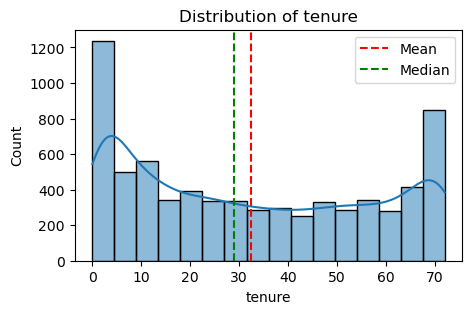

In [91]:
plot_histogram(df, 'tenure')

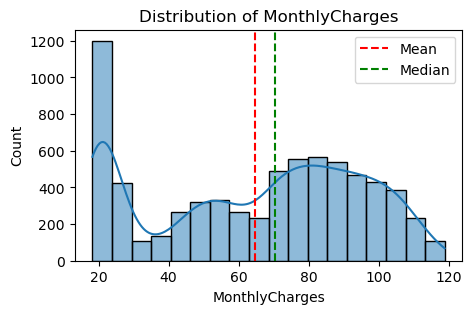

In [92]:
plot_histogram(df, 'MonthlyCharges')

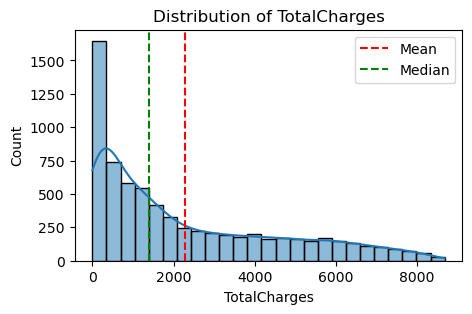

In [93]:
plot_histogram(df, 'TotalCharges')

In [94]:
##define a function to create boxplot for all columns in the dataframe
def plot_boxplot(df, column_name):

    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.ylabel(column_name)
    plt.show()
    

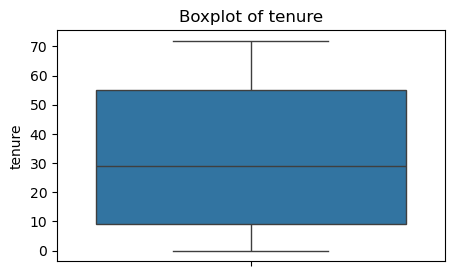

In [95]:
plot_boxplot(df, 'tenure')

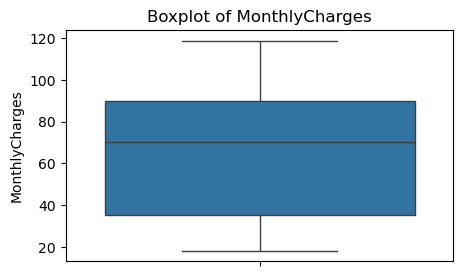

In [96]:
plot_boxplot(df, 'MonthlyCharges')

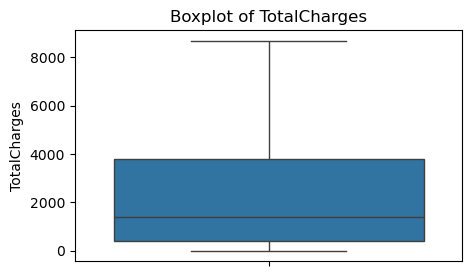

In [97]:
plot_boxplot(df, 'TotalCharges')

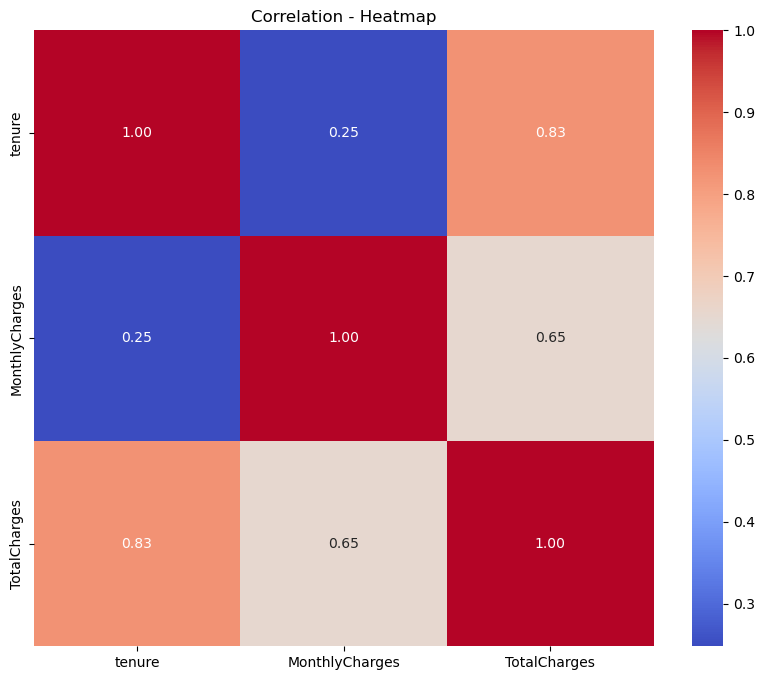

In [98]:
#plot the columns in a correlation matrix-heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation - Heatmap")
plt.show()

**Categorical columns analysis**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [100]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()
categorical_columns = ['SeniorCitizen']+categorical_columns

print(categorical_columns)

['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


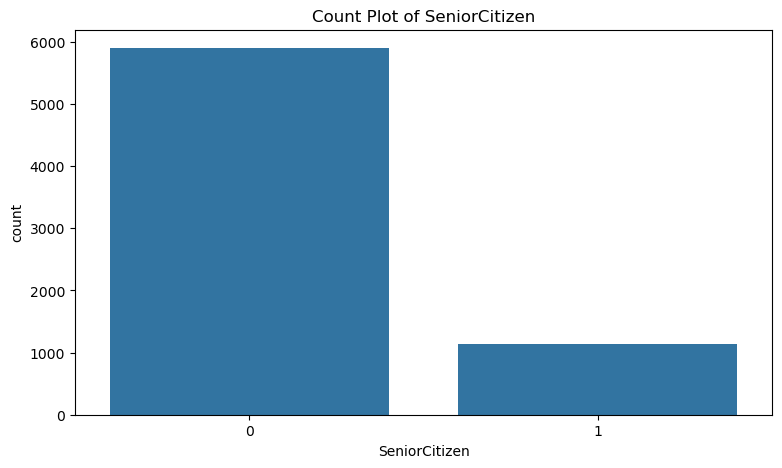

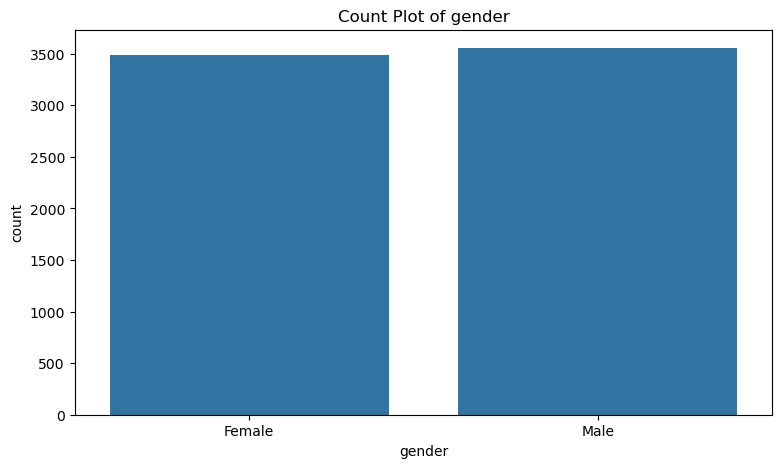

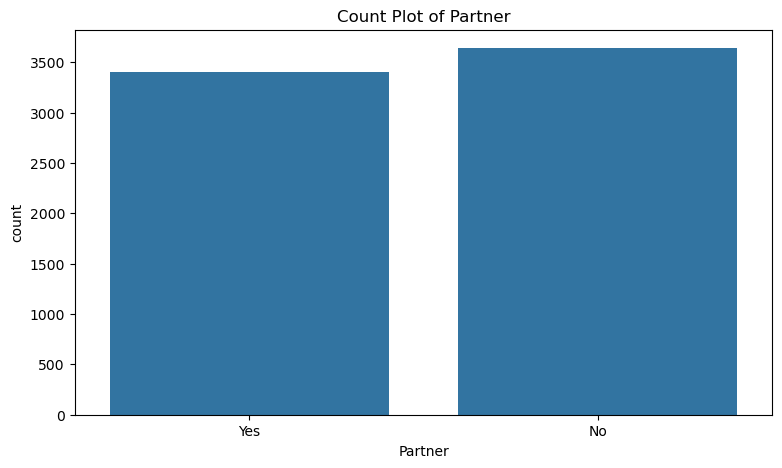

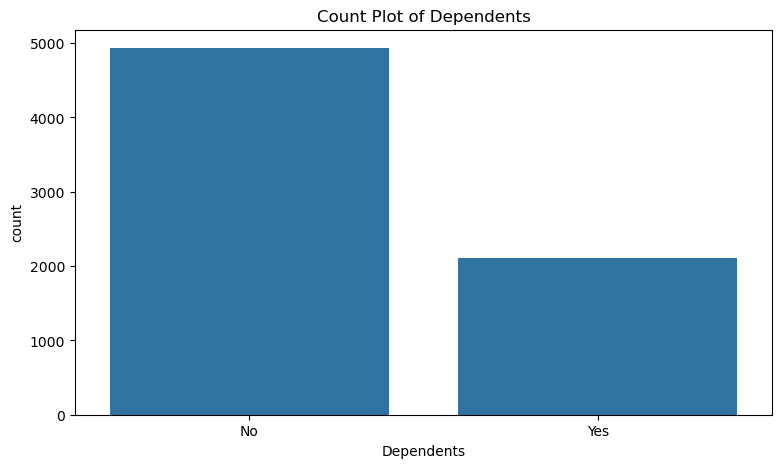

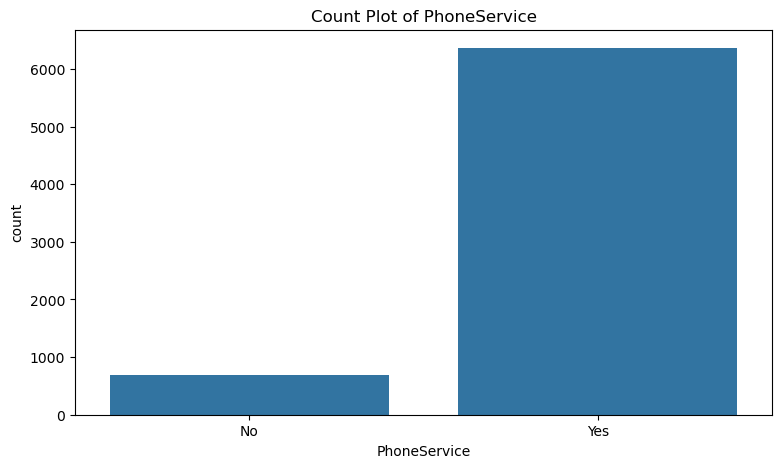

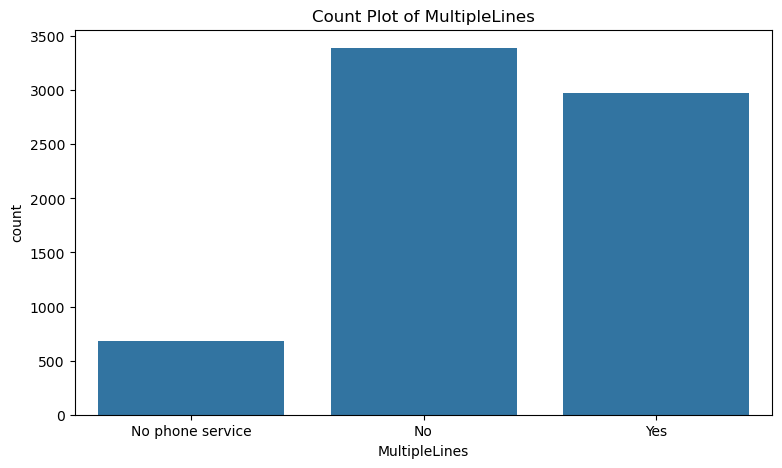

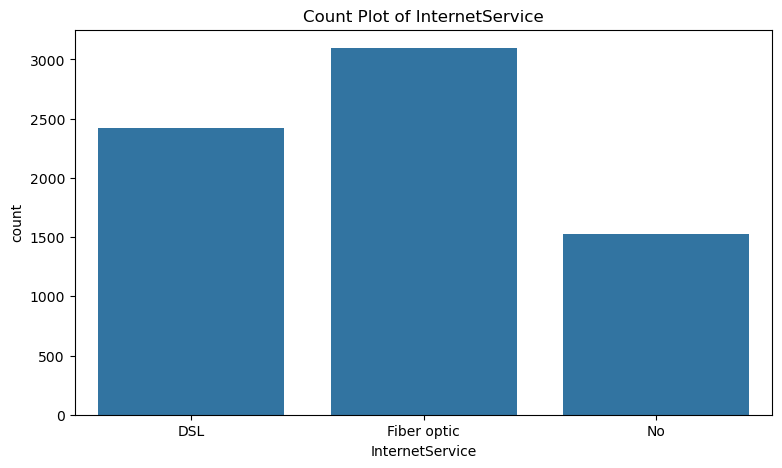

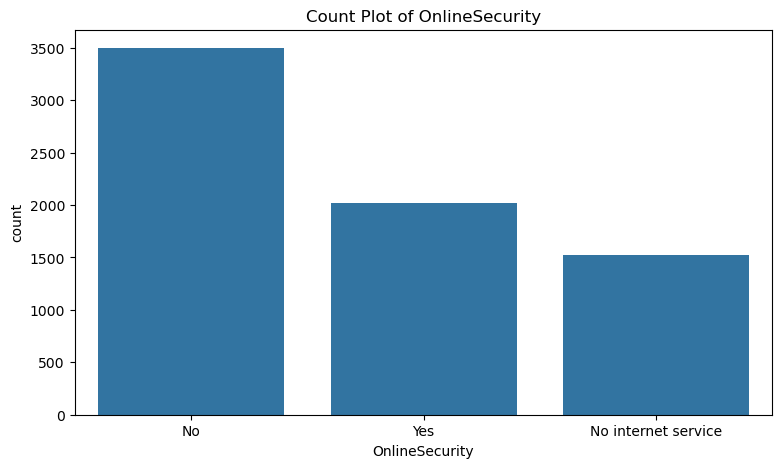

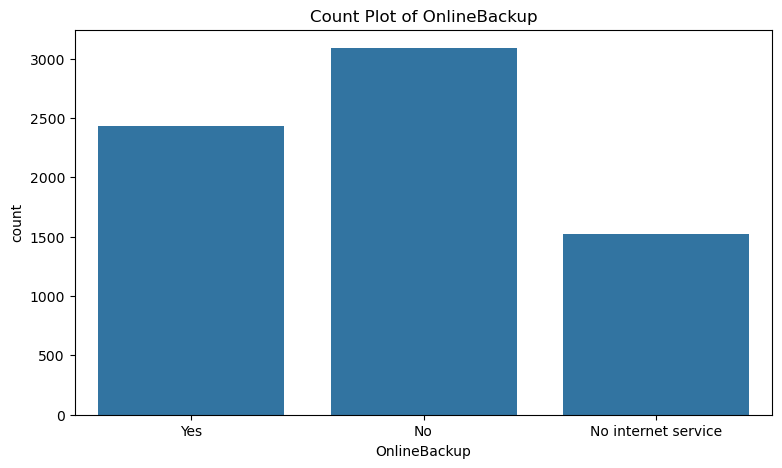

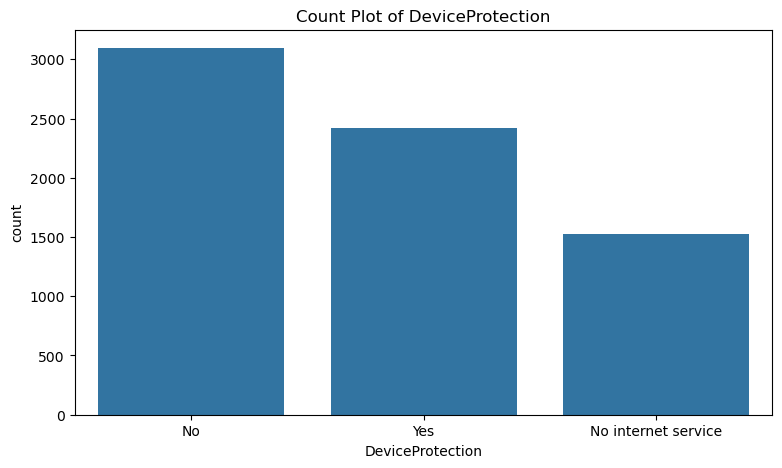

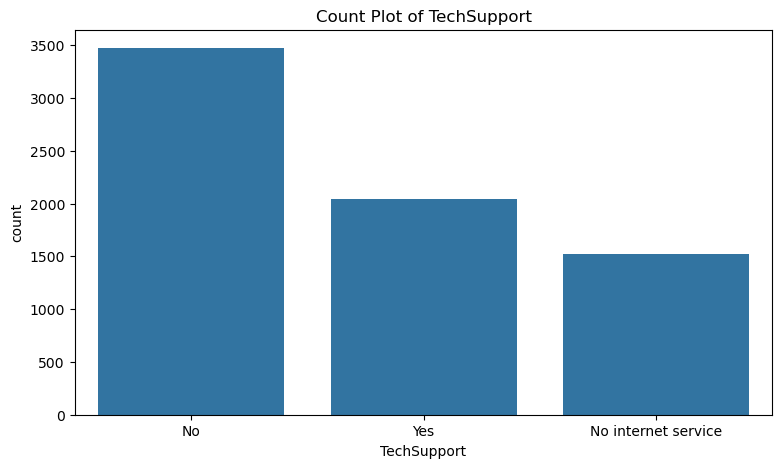

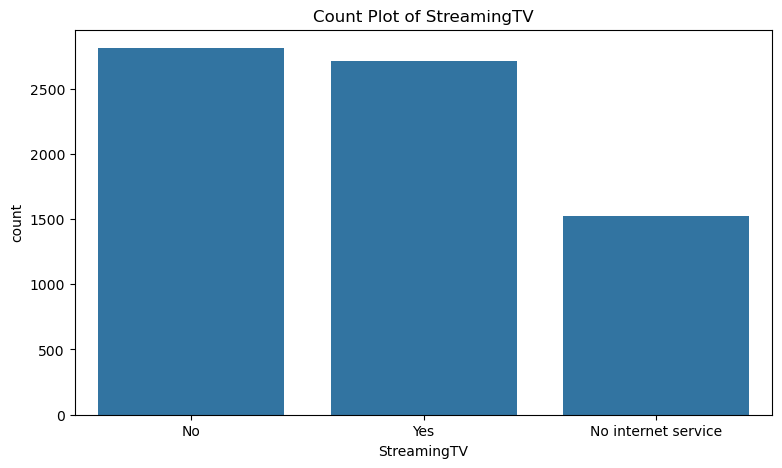

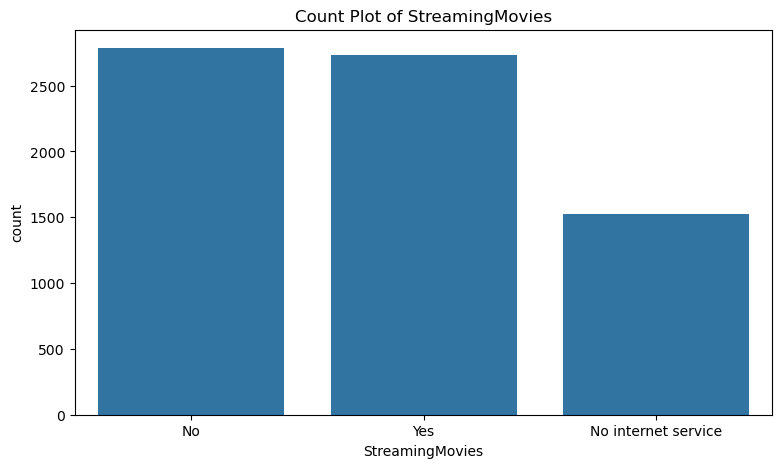

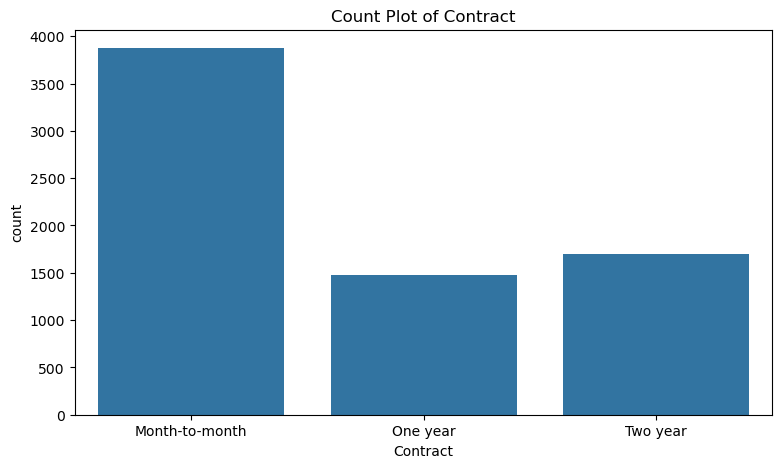

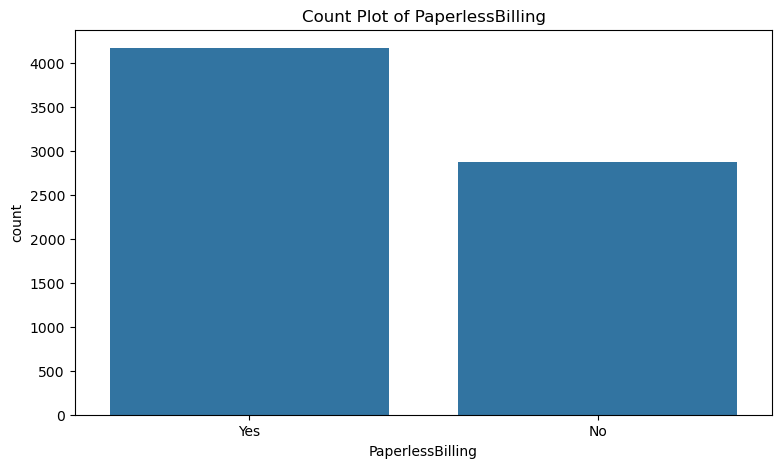

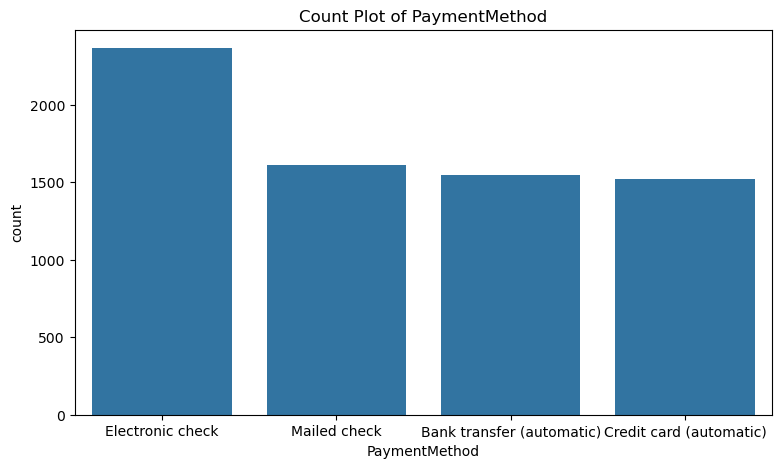

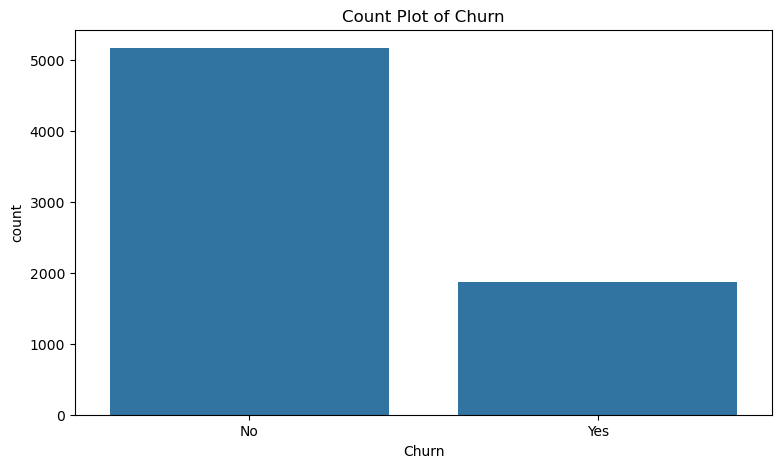

In [101]:
##define a function to create histogram for all columns in the dataframe
for col in categorical_columns:
  plt.figure(figsize=(9,5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**Data Preprocessing**

In [102]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No':0})

/var/folders/zb/9y3m4bsj353cyyw4_5zwl7pc0000gn/T/ipykernel_52192/3601583993.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No':0})


In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [104]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

**LabelEncoding**

In [105]:
categorical_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [106]:
object_columns = df.select_dtypes(include="object").columns.to_list()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [107]:
for column in object_columns:
    print(type(column), column) 

<class 'str'> gender
<class 'str'> Partner
<class 'str'> Dependents
<class 'str'> PhoneService
<class 'str'> MultipleLines
<class 'str'> InternetService
<class 'str'> OnlineSecurity
<class 'str'> OnlineBackup
<class 'str'> DeviceProtection
<class 'str'> TechSupport
<class 'str'> StreamingTV
<class 'str'> StreamingMovies
<class 'str'> Contract
<class 'str'> PaperlessBilling
<class 'str'> PaymentMethod


In [108]:
#initialize the labelencoder for the categorical columns
encoders = {}

#apply label encoding
for col in object_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

#save the encoders in pkl format for deployment
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)



In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Modeling**

**train,test,split and cross-val**

In [110]:
X = df.drop(columns = ['Churn'])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [111]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [112]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


In [114]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


**Since there are imbalanced data, we will use SMOTE**

In [115]:
smote = SMOTE(random_state=42)

In [116]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [117]:
print(y_train_smote.shape)

(8276,)


In [118]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model Training**

In [119]:
#Use dafault hyperparameters for the baseline
models = {
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [120]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="f1")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.77
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.83
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.74
----------------------------------------------------------------------


**RandomForest gives the best F1 score out of the three models**

In [122]:
#Define the model
rf = RandomForestClassifier(random_state=42)

#Define the hyperparameter grid
param_grid = {
    'n_estimators':[100, 200, 300, 500], #number of trees
    'max_depth': [None, 5, 10, 15, 20],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Min samples at leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features considered at each split
    'class_weight': ['balanced', None]          # Handle imbalanced classes
}

# Use GridSearchCV with F1 score
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',        # Optimizing for F1 score
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

#Fit the training data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END class_weight=balanced, max_depth=None, max_features=sqrt

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced', None], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [123]:
# Best parameters and F1 score
print("Best F1 Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best F1 Score: 0.8360760604970678
Best Parameters: {'class_weight': None, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Model Evaluation**

In [136]:
best_params = grid_search.best_params_
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train_smote, y_train_smote)


,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
#Evaulate on the test data
y_test_pred = rf.predict(X_test)

In [138]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("F1 Score (Churn class):\n", f1_score(y_test, y_test_pred, pos_label=1))
print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
 [[857 179]
 [137 236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.57      0.63      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

F1 Score (Churn class):
 0.5989847715736041
Accuracy Score:
 0.7757274662881476


In [149]:
from joblib import dump, load

In [150]:
# save the trained model as a pickle file
model_data = {"model": rf, "features_names": X.columns.tolist()}

# Save with compression (level 3 is a good balance)
dump(model_data, "customer_churn_model.joblib", compress=3)

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**Load the saved data and build a predictive model**

In [151]:
#load the saved data and feature names
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)
loaded_model = model_data["model"]
feature_names = model_data["features_names"]



In [152]:
print(loaded_model)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)


In [153]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

In [156]:
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

In [157]:
# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.74678533 0.25321467]]
